In [1]:
#1 Find S
import csv

dataset = csv.reader(open("Weather.csv","rt"))
dataset = list(dataset)
print(dataset)


attributes = ['Sky','Temp','Humidity','Wind','Water','Forecast']
target = ["Yes","Yes","No","Yes"]

hypothesis = ['0'] * len(attributes)


for i in range(len(target)):
    if(target[i] == 'Yes'):
        for j in range(len(attributes)):
            if(hypothesis[j]=='0'):
                hypothesis[j] = dataset[i][j]
            if(hypothesis[j]!= dataset[i][j]):
                hypothesis[j]='?'

    print(i+1,'=',hypothesis)


[['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same', 'Yes'], ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same', 'Yes'], ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change', 'No'], ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change', 'Yes']]
1 = ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
2 = ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
3 = ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
4 = ['Sunny', 'Warm', '?', 'Strong', '?', '?']


In [2]:
#2
# Candidate elimination
import pandas as pd
import numpy as np

data = pd.read_csv("Weather2.csv")
print(data)
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
print(concepts,end="\n")
print(target)

def learn(concepts,target):
    specific_h = concepts[0].copy()
    print(specific_h)

    general_h = [["?" for j in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    
    for i, h in enumerate(concepts):
        
        if target[i] == "Yes":
            for x in range(len(specific_h)):
            
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'

        
        if target[i] == "No":
            for x in range(len(specific_h)):
            
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("steps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
        
    # find indices where we have empty rows, meaning those that are unchanged
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    
    for i in indices:
    # remove those rows from general_h
        general_h.remove(['?', '?', '?', '?', '?', '?'])

    # Return final values
    return specific_h, general_h


s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")


     Sky   Air Humidity    Wind Water Forecast EnjoySport
0  Sunny  Warm   Normal  Strong  Warm     Same        Yes
1  Sunny  Warm     High  Strong  Warm     Same        Yes
2  Rainy  Cold     High  Strong  Warm   Change         No
3  Sunny  Warm     High  Strong  Cold   Change        Yes
[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cold' 'Change']]
['Yes' 'Yes' 'No' 'Yes']
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
steps of Candidate Elimination Algorithm 1
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?

Program 4 : Naive Bayes Classifier

In [3]:
#4th 
# Naive Bayes Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

dataset = pd.read_csv("naive.csv")
dataset_df = pd.DataFrame(dataset)

en = preprocessing.LabelEncoder()
dataset_df_encoded = dataset_df.apply(en.fit_transform)

data = dataset_df_encoded.drop(['play'], axis=1)
target = dataset_df_encoded['play']
print(data)
print(target)

X_train,X_test,Y_train,Y_test = train_test_split(data,target,test_size = 0.25)
model = GaussianNB()
learntModel = model.fit(X_train,Y_train)
prediction = learntModel.predict(X_test)
print(list(prediction))
print(list(Y_test))

print("Accuracy : ", metrics.accuracy_score(prediction,Y_test))

    outlook  temp  humidity  windy
0         2     1         0      0
1         2     1         0      1
2         0     1         0      0
3         1     2         0      0
4         1     0         1      0
5         1     0         1      1
6         0     0         1      1
7         2     2         0      0
8         2     0         1      0
9         1     2         1      0
10        2     2         1      1
11        0     2         0      1
12        0     1         1      0
13        1     2         0      1
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64
[1, 0, 0, 0]
[0, 0, 1, 1]
Accuracy :  0.25


Program 3 : KNN classification algorithm

In [2]:
# 3
# KNN classification algorithm
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

iris = load_iris()
# print(iris.data)
# print(iris.feature_names)
# print(iris.target_names)
# print(iris.target)

X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size = 0.25)
model = KNeighborsClassifier()

trainedModel = model.fit(X_train,Y_train)
prediction = trainedModel.predict(X_test)
print(list(prediction))
print(list(Y_test))

mismatch = prediction - Y_test
print(mismatch)
print("Total missclassified, : " , sum(abs(mismatch)))
print("Accuracy : ",metrics.accuracy_score(prediction,Y_test))

[2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0]
[2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0]
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
Total missclassified, :  2
Accuracy :  0.9473684210526315


In [5]:
#5
#Back propagation
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

data = pd.read_csv("iris.data", header=None, names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Class'])
data.head()

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

ss = StandardScaler()
values = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123456)



n = 10
loss_cur = 999
classifier = MLPClassifier(hidden_layer_sizes=(4,3), activation='logistic', solver='sgd', learning_rate_init=0.5, warm_start=True, max_iter=1, verbose=True)
for _ in range(n):
    classifier.fit(X_train, y_train)
    loss_prev = loss_cur
    loss_cur = classifier.loss_
    for i in classifier.coefs_:
        print(i, end='\n\n')
    if abs(loss_cur - loss_prev) < 0.0001:
        break
y_pred = classifier.predict(X_test)



Iteration 1, loss = 1.15057994
[[-0.29968118  0.49400641 -0.23653499 -0.06805553]
 [-0.43106964 -0.46812616 -0.09155399  0.33761894]
 [ 0.11217216  0.08216665 -0.33363399  0.01977072]
 [ 0.28753013 -0.09700583 -0.28894015  0.47520651]]

[[-0.06995448  0.42001524  0.27099346]
 [ 0.08611322 -0.17696262  0.03424357]
 [-0.23673049 -0.50614761 -0.09128623]
 [-0.19782315 -0.49824503 -0.27588656]]

[[-0.04251623 -0.01780034  0.00528582]
 [ 0.02158408 -0.41977904  0.31271335]
 [ 0.48530942  0.41782943 -0.42557136]]

Iteration 2, loss = 1.10573719
[[-0.30606386  0.49416925 -0.23737534 -0.06216774]
 [-0.43338416 -0.46803409 -0.09277328  0.33784232]
 [ 0.10599941  0.08182747 -0.33275818  0.02898392]
 [ 0.28533943 -0.09732052 -0.28854914  0.47863662]]

[[-0.07002494  0.41959524  0.26767268]
 [ 0.08544171 -0.18019249  0.01337166]
 [-0.23679907 -0.50610267 -0.08770248]
 [-0.19838118 -0.49955752 -0.29530987]]

[[-0.10795383  0.01299539  0.03992775]
 [-0.03222172 -0.39381568  0.34055589]
 [ 0.42502672

/home/amsiri/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [7]:

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm, sep='\n')
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)


for i in classifier.coefs_:
    print(i, end='\n\n')

Confusion Matrix:
[[ 8  0  0]
 [ 9  0  0]
 [13  0  0]]
Accuracy: 0.26666666666666666
[[-0.34263171  0.49197621 -0.2096903  -0.04245951]
 [-0.44407231 -0.4717055  -0.07978885  0.3260856 ]
 [ 0.06675895  0.08073017 -0.31646686  0.08228921]
 [ 0.27156701 -0.09942171 -0.28485853  0.49894351]]

[[-0.06765865  0.41841399  0.24804891]
 [ 0.07543626 -0.19505509 -0.06910693]
 [-0.25537646 -0.51668057 -0.02890029]
 [-0.21184627 -0.49347727 -0.37855587]]

[[-0.09166709  0.00770972  0.02892765]
 [-0.01257273 -0.39115575  0.31824849]
 [ 0.44931916  0.44325137 -0.41501207]]



Eliminating: sex: 100%|██████████| 4/4 [00:00<00:00, 407.64it/s]

+---------+------------+
| age(29) | 0.00330033 |
+---------+------------+
| age(34) | 0.00660066 |
+---------+------------+
| age(35) | 0.0132013  |
+---------+------------+
| age(37) | 0.00660066 |
+---------+------------+
| age(38) | 0.00990099 |
+---------+------------+
| age(39) | 0.0132013  |
+---------+------------+
| age(40) | 0.00990099 |
+---------+------------+
| age(41) | 0.0330033  |
+---------+------------+
| age(42) | 0.0264026  |
+---------+------------+
| age(43) | 0.0264026  |
+---------+------------+
| age(44) | 0.0363036  |
+---------+------------+
| age(45) | 0.0264026  |
+---------+------------+
| age(46) | 0.0231023  |
+---------+------------+
| age(47) | 0.0165017  |
+---------+------------+
| age(48) | 0.0231023  |
+---------+------------+
| age(49) | 0.0165017  |
+---------+------------+
| age(50) | 0.0231023  |
+---------+------------+
| age(51) | 0.039604   |
+---------+------------+
| age(52) | 0.0429043  |
+---------+------------+
| age(53) | 0.0264026  |


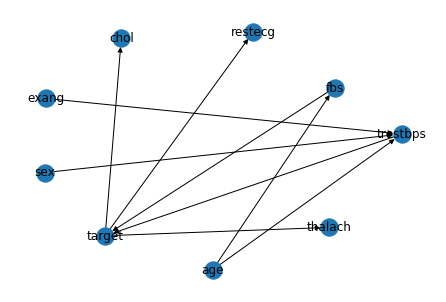

In [11]:
#6
#Bayesian Belief

import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator

heart = pd.read_csv('heart.csv')

model = BayesianNetwork([('age','trestbps'), ('age','fbs'), ('sex','trestbps'), ('exang','trestbps'), ('trestbps','target'), ('fbs','target'), ('target','restecg'), ('target','thalach'), ('target','chol')])
model.fit(heart, estimator=MaximumLikelihoodEstimator)
infer = VariableElimination(model)
for i in model.get_cpds():
    print(i)

q = infer.query(variables=['target'], evidence={'trestbps':160})
print(q)

import networkx as nx
nx.draw(model, with_labels=True)

In [13]:
#7
# EM and KMeans

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import completeness_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']


Text(0, 0.5, 'Petal Width')

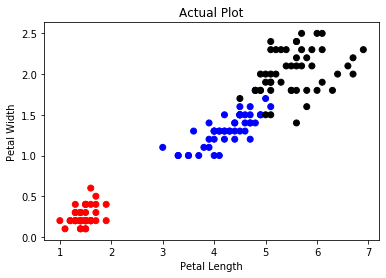

In [15]:
colormap=np.array(['red','blue','black'])
# Actual Plot
plt.scatter(X.Petal_Length, X.Petal_Width,c=colormap[iris.target])
plt.title('Actual Plot')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

The completeness score of K-Means:  0.7649861514489816


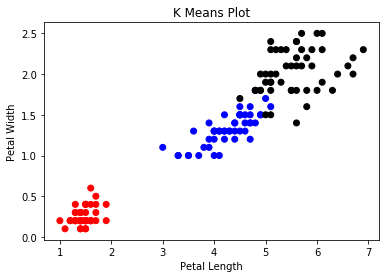

In [16]:
# K-Means Plot
model=KMeans(n_clusters=3)
model.fit(X)

plt.scatter(X.Petal_Length, X.Petal_Width,c=colormap[iris.target])
plt.title('K Means Plot')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The completeness score of K-Means: ',completeness_score(iris.target, model.labels_))

The completeness score of EM:  0.9010648908640206


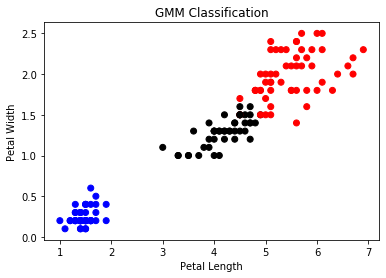

In [17]:
# EM Plot
gmm=GaussianMixture(n_components=3)
gmm.fit(X)
target_pred=gmm.predict(iris.data)

plt.scatter(X.Petal_Length, X.Petal_Width,c=colormap[target_pred])
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The completeness score of EM: ',completeness_score(iris.target, target_pred))

Text(0, 0.5, 'Tip')

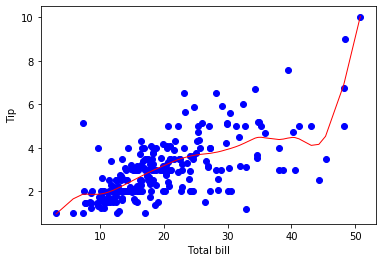

In [20]:
#8
#Locally Weighted Regression

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point,xmat, k):
    m,n= np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

data = pd.read_csv('tips_LinearRegression.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)

mbill = np.mat(bill) 
mtip = np.mat(tip)
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X= np.hstack((one.T,mbill.T))

ypred = localWeightRegression(X,mtip,2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='blue')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=1)
plt.xlabel('Total bill')
plt.ylabel('Tip')

The Data Set ( 10 Samples) X:
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y:
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Jitter (10 Samples) X :
 [-2.8733797  -2.96769966 -2.92879996 -3.08265756 -3.18952656 -2.81916812
 -3.06344512 -3.07335362 -2.97321783]
 Xo Domain Space(10 Samples):
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


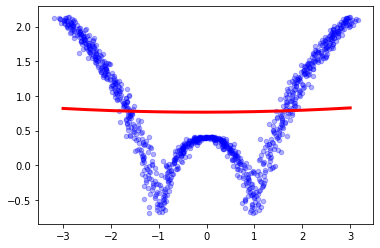

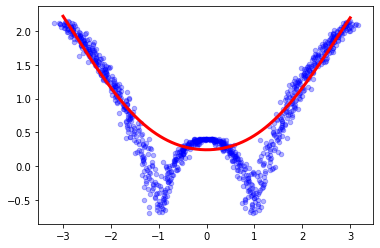

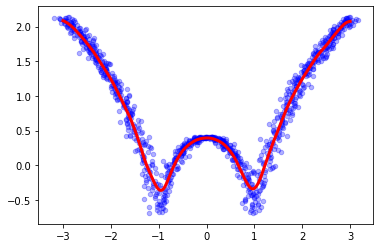

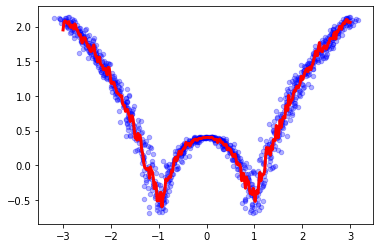

In [21]:
# 8 (Alternative) - Locally Weighted Regression !!

import numpy as np
import matplotlib.pyplot as plt


# Bokeh version is in alternatives folder


def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))  # Weight or Radial Kernel Bias Function


def local_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0]  # Add one to avoid the loss in information
    X = np.c_[np.ones(len(X)), X]

    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, tau)  # XTranspose * W

    beta = np.linalg.pinv(xw @ X) @ xw @ Y  # @ Matrix Multiplication or Dot Product

    # predict value
    return x0 @ beta  # @ Matrix Multiplication or Dot Product for prediction


n = 1000
# Generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X:\n", X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y:\n", Y[1:10])
# Jitter X
X += np.random.normal(scale=.1, size=n)
print("Jitter (10 Samples) X :\n", X[1:10])

domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples):\n", domain[1:10])


def plot_lwr(tau):
    # Prediction through regression
    predictions = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.scatter(X, Y, color='blue', alpha=0.3, s=20)
    plt.plot(domain, predictions, color='red', linewidth=3)
    plt.show()


# Plotting the curves with different tau
plot_lwr(10.)
plot_lwr(1.)
plot_lwr(0.1)
plot_lwr(0.01)